In [1]:
import cv2

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from keras import models, layers, optimizers

from pathlib import Path
from sklearn.metrics import confusion_matrix
from vis.utils import utils

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
weights = Path('C:/Users/npurk/Desktop/VAE/monkey_model.h5')
train_dir = Path('C:/Users/npurk/Desktop/VAE/training/')
test_dir = Path('C:/Users/npurk/Desktop/VAE/validation/')

In [3]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("C:/Users/npurk/Desktop/VAE/monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


(367, 550, 3)


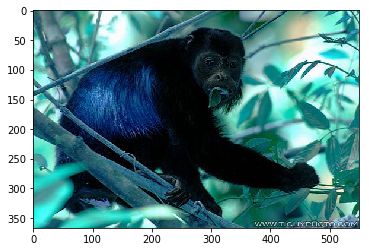

In [4]:
img = cv2.imread('C:/Users/npurk/Desktop/VAE/training/n0018.jpg')
print(img.shape)
plt.imshow(img);

In [5]:
import os

all_monkeys = []
for image in os.listdir(train_dir):
    try:
        monkey = utils.load_img(('C:/Users/npurk/Desktop/VAE/training/' + image), target_size=(64,64))
        all_monkeys.append(monkey)
    except Exception as e:
        pass
    
print('Recovered data format:', type(all_monkeys))    
print('Number of monkey images:', len(all_monkeys))

D:\Anaconda\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Recovered data format: <class 'list'>
Number of monkey images: 1094


In [6]:
# Make into array
all_monkeys = np.asarray(all_monkeys)
print('Shape of array:', all_monkeys.shape)

# Normalize pixel values
all_monkeys = all_monkeys.astype('float32') / 255.

# Flatten array
all_monkeys = all_monkeys.reshape((len(all_monkeys), np.prod(all_monkeys.shape[1:])))
print('Shape after flattened:', all_monkeys.shape)

Shape of array: (1094, 64, 64, 3)
Shape after flattened: (1094, 12288)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(all_monkeys, all_monkeys, test_size=0.2, random_state=42)

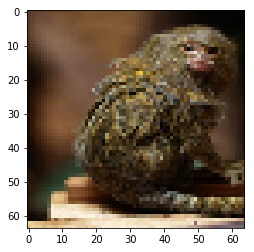

In [8]:
plt.imshow(x_train[6].reshape(64, 64, 3))

In [9]:
x_train.shape, x_test.shape

((875, 12288), (219, 12288))

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

In [11]:
## Input dimension
input_dim = 12288

## Encoding dimension for the latent space
encoding_dim = 256

In [12]:
# Input layer placeholder
input_layer = Input(shape=(input_dim,))

# Encoding layers funnel the images into lower dimensional representations
encoded = Dense(encoding_dim * 4, activation='relu')(input_layer)
encoded = Dense(encoding_dim * 2, activation='relu')(encoded)

# Latent space
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim * 2, activation='relu')(encoded)
decoded = Dense(encoding_dim * 4, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)

In [13]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 12288)             12595200  
Total para

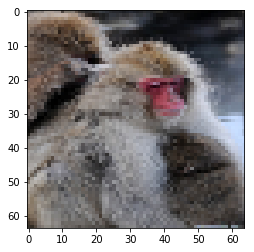

In [26]:
plt.imshow(x_train[5].reshape(64,64,3))

In [25]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=20, verbose=1) 

Epoch 1/100
875/875 [==============================] - 15s 17ms/step - loss: 0.0061
Epoch 2/100
875/875 [==============================] - 13s 15ms/step - loss: 0.0030
Epoch 3/100
875/875 [==============================] - 13s 15ms/step - loss: 0.0025
Epoch 4/100
875/875 [==============================] - 14s 16ms/step - loss: 0.0024
Epoch 5/100
875/875 [==============================] - 13s 15ms/step - loss: 0.0024
Epoch 6/100
875/875 [==============================] - 14s 15ms/step - loss: 0.0027
Epoch 7/100
875/875 [==============================] - 14s 17ms/step - loss: 0.0033
Epoch 8/100
875/875 [==============================] - 15s 17ms/step - loss: 0.0036
Epoch 9/100
875/875 [==============================] - 15s 17ms/step - loss: 0.0036
Epoch 10/100
875/875 [==============================] - 14s 17ms/step - loss: 0.0037
Epoch 11/100
875/875 [==============================] - 14s 17ms/step - loss: 0.0039
Epoch 12/100
875/875 [==============================] - 14s 16ms/step - lo

In [27]:
autoencoder.save('C:/Users/npurk/Desktop/AE/Deep_FF_AE.h5py')

In [30]:
from keras.models import load_model
autoencoder = load_model('C:/Users/npurk/Desktop/AE/Deep_FF_AE.h5py')

In [39]:
decoded_imgs = autoencoder.predict(x_test)

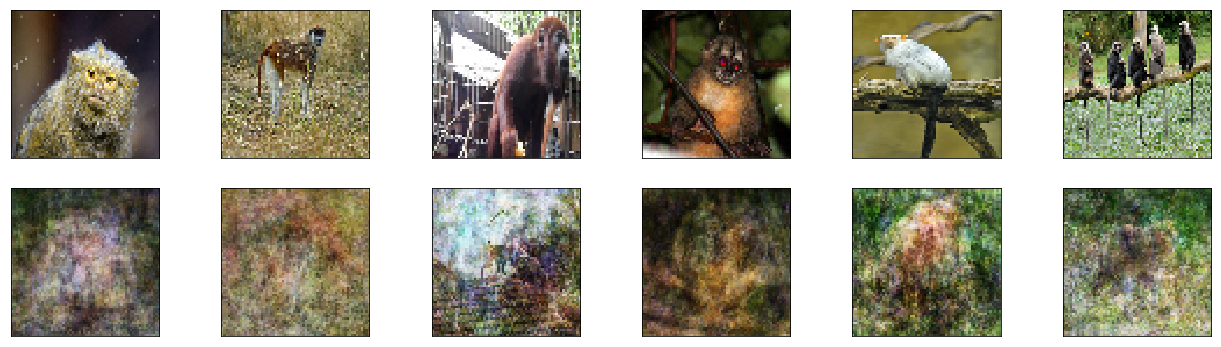

In [44]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 6  # how many digits we will display
plt.figure(figsize=(22, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64, 3))    #x_test
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()